In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
df.sample(5)

,Category,Message
214,ham,Yup... How ü noe leh...
2785,ham,"K, wat s tht incident?"
3786,ham,Let me know if you need anything else. Salad o...
3723,ham,I'm in a movie... Collect car oredi...
3529,spam,You are a £1000 winner or Guaranteed Caller Pr...


In [6]:
df.shape

(5572, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Category    5572 non-null object
Message     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [8]:
df.rename(columns={'Category':'target','Message':'text'},inplace=True)
df.sample(5)

,target,text
5182,ham,I sent them. Do you like?
4581,ham,Hi ....My engagement has been fixd on &lt;#&g...
157,ham,I'm leaving my house now...
17,ham,Eh u remember how 2 spell his name... Yes i di...
5506,ham,God's love has no limit. God's grace has no me...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

415

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5157, 2)

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

<Figure size 640x480 with 1 Axes>

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SK NAZEER
[nltk_data]     PASHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:

df['num_characters'] = df['text'].apply(len)

C:\Users\SK NAZEER PASHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\SK NAZEER PASHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\SK NAZEER PASHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.390537,1.965290
std,58.382922,13.307527,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [29]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.101417,1.822852
std,56.708301,13.488402,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [30]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.472699,2.968799
std,30.399707,6.988134,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,44.000000,9.000000


In [31]:
import seaborn as sns

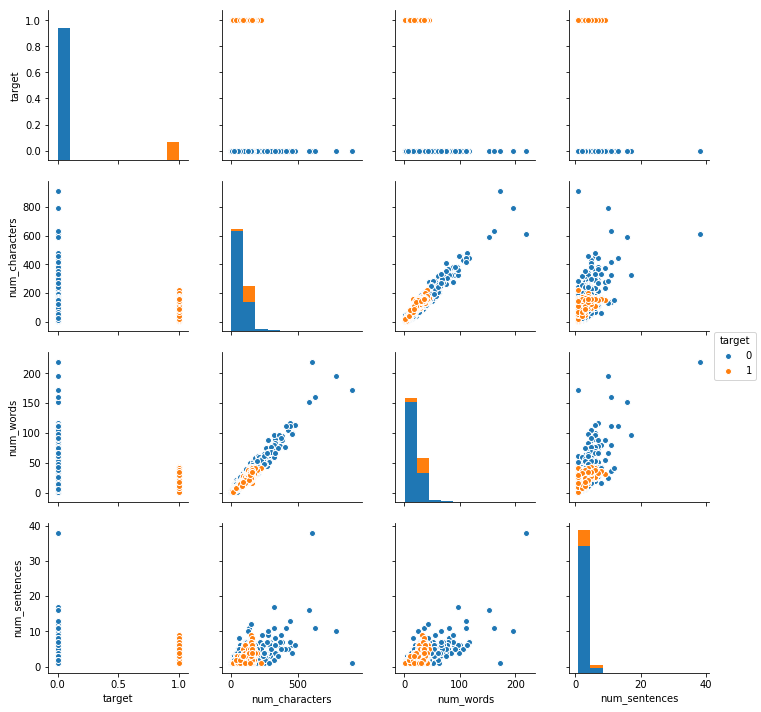

In [32]:
sns.pairplot(df,hue='target')

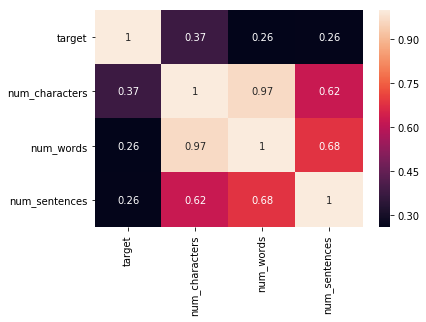

In [33]:
sns.heatmap(df.corr(),annot=True)

In [34]:
def transform_text(text):
    text=text.lower()
    return text

In [35]:
transform_text('Aight will do, thanks again for comin out')

'aight will do, thanks again for comin out'

In [36]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    return text

In [37]:
transform_text('I Am Khajabi')

['i', 'am', 'khajabi']

In [38]:
df['text'][1000]

'Aight will do, thanks again for comin out'

In [39]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [40]:
transform_text('I Am Khajabi 20% eg')

['i', 'am', 'khajabi', '20', 'eg']

In [41]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SK NAZEER
[nltk_data]     PASHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y

In [46]:
transform_text('I Am khajabi')

['khajabi']

In [47]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [48]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y) 

In [49]:
transform_text('happining')

'happin'

In [50]:
transform_text('Aight will do, thanks again for comin out')

'aight thank comin'

In [51]:
df['transform_text']= df['text'].apply(transform_text)

C:\Users\SK NAZEER PASHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [89]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [90]:
len(spam_corpus)

9726

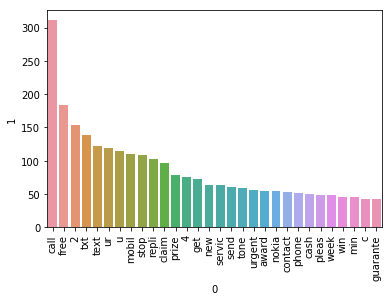

In [91]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

35290

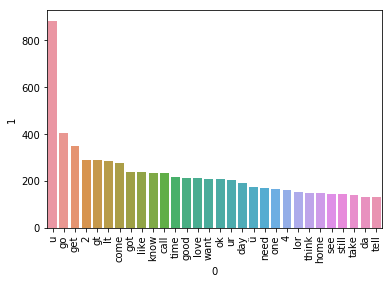

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# MODEL BUILDING

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [59]:
X.shape

(5157, 3000)

In [60]:
y = df['target'].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8624031007751938
[[779 126]
 [ 16 111]]
0.46835443037974683


In [66]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9718992248062015
[[905   0]
 [ 29  98]]
1.0


In [67]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825581395348837
[[903   2]
 [ 16 111]]
0.9823008849557522


In [87]:
#Tfidf -->MNB

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [79]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [81]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9767441860465116, 0.9813084112149533)

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9767441860465116
Precision -  0.9813084112149533
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9718992248062015
Precision -  1.0
For  DT
Accuracy -  0.937015503875969
Precision -  0.8297872340425532
For  LR
Accuracy -  0.9593023255813954
Precision -  0.9381443298969072
For  RF
Accuracy -  0.9718992248062015
Precision -  1.0
For  AdaBoost
Accuracy -  0.9680232558139535
Precision -  0.9607843137254902
For  BgC
Accuracy -  0.9641472868217055
Precision -  0.9017857142857143
For  ETC
Accuracy -  0.9757751937984496
Precision -  0.9903846153846154
For  GBDT
Accuracy -  0.9486434108527132
Precision -  0.9743589743589743


In [105]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [106]:
performance_df

,Algorithm,Accuracy,Precision
1,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.912791,1.000000
2,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.971899,1.000000
5,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.971899,1.000000
8,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.975775,0.990385
0,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.976744,0.981308
9,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.948643,0.974359
6,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.968023,0.960784
4,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.959302,0.938144
7,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.964147,0.901786
3,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",0.937016,0.829787


In [107]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [108]:
performance_df1

,Algorithm,variable,value
0,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.912791
1,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.971899
2,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.971899
3,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.975775
4,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.976744
5,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.948643
6,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.968023
7,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.959302
8,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.964147
9,"(SVC, KN, NB, DT, LR, RF, AdaBoost, BgC, ETC, ...",Accuracy,0.937016
